In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Retrieve Running Back DataFrame 
# from "Importing Data & Statistical Correlation" Jupyter Notebook
%store -r rb

In [3]:
# Create arrays for the features and the response variable
# New rb to test float v ints

new_rb = rb.drop(columns=['Player','Tm','FantPos','Cmp','Att','Yds',
                          'TD','Int','DKPt','FDPt','VBD',
                          'PosRank','OvRank'],axis=1)

new_rb['FantPt'] = new_rb['FantPt'].astype(np.int64)
new_rb['Year'] = new_rb['Year'].astype(np.int64)

In [4]:
# Get rid of current year points and shift up next years FantPts
y_rb = new_rb['FantPt']
conv_years = [1 if values == 2018 else 0 for values in new_rb.Year]
new_rb['Year'] = conv_years
X_rb = new_rb.drop(columns=['FantPt'],axis=1)

In [5]:
X_rb.head()

,Age,G,GS,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,Year
0,24,14,14,256,1251,4.89,17,81,59,580,9.83,4,1,1,21,3.0,0.0,372.1,1
1,21,16,16,261,1307,5.01,11,121,91,721,7.92,4,0,0,15,1.0,0.0,385.8,1
2,22,16,16,219,1098,5.01,7,124,107,867,8.10,6,4,1,13,0.0,0.0,385.5,1
3,23,15,13,194,883,4.55,14,105,81,709,8.75,4,1,0,18,3.0,0.0,354.2,1
4,23,15,15,304,1434,4.72,6,95,77,567,7.36,3,6,1,9,0.0,0.0,329.1,1


In [6]:
y_rb.head()

0    313
1    295
2    279
3    273
4    252
Name: FantPt, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_rb,y_rb,test_size=0.275,
                                                    random_state=411)

In [8]:
# Creating Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Scoring the Linear Regression Model
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print("Linear Regression Train Score:", train_score.round(7))
print("Linear Regression Test Score:", test_score.round(7))
# Predict on the test data: y_pred
y_pred = lr.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Linear Regression Train Score: 0.9998663
Linear Regression Test Score: 0.9998662
Root Mean Squared Error: 0.64407


In [9]:
# Random Forest Regression Scores
rf = RandomForestRegressor(n_estimators=2000)
rf.fit(X_train, y_train)
# Scoring the Random Forrest Regression Model
RF_train_score = rf.score(X_train,y_train)
RF_test_score = rf.score(X_test, y_test)
print("Random Forest Regression Train Score:", RF_train_score.round(7))
print("Random Forest Regression Test Score:", RF_test_score.round(7))
# Predict on the test data: y_pred_rf
y_pred_rf = rf.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Random Forest Regression Train Score: 0.9980861
Random Forest Regression Test Score: 0.9758277
Root Mean Squared Error: 8.65765


In [10]:
# Creating Ridge Regression Model - Low Alpha
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
# Scoring the Ridge Regression Model
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
coeff_used01 = np.sum(rr.coef_!=0)
print("Ridge Regression Train Score Low Alpha:", Ridge_train_score.round(7))
print("Ridge Regression Test Score Low Alpha:", Ridge_test_score.round(7))
print("Number of Features Used for Alpha=100:", coeff_used01)
# Predict on the test data: y_pred
y_pred_rr = rr.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Ridge Regression Train Score Low Alpha: 0.9998663
Ridge Regression Test Score Low Alpha: 0.9998655
Number of Features Used for Alpha=100: 18
Root Mean Squared Error: 0.64573


In [11]:
# Ridge Regression Analysis - High Alpha
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
# Scoring the Ridge Regression Model
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
coeff_used100 = np.sum(rr100.coef_!=0)
print("Ridge Regression Train Score High Alpha:", Ridge_train_score100.round(7))
print("Ridge Regression Test Score High Alpha:", Ridge_test_score100.round(7))
print("Number of Features Used for Alpha=100:", coeff_used100)
# Predict on the test data: y_pred
y_pred_rr100 = rr100.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr100))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Ridge Regression Train Score High Alpha: 0.9997096
Ridge Regression Test Score High Alpha: 0.9994709
Number of Features Used for Alpha=100: 18
Root Mean Squared Error: 1.28093


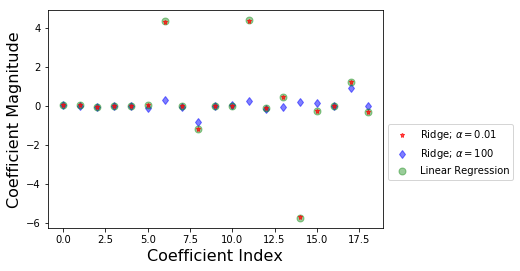

In [12]:
# Plot for Ridge Regression Coefficient - Low Alpha
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Plot for Ridge Regression Coefficient - High Alpha
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,
         color='blue',label=r'Ridge; $\alpha = 100$') 

# Plot for Linear Regression Coefficient
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,
         color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:
# This plot is a viual display of how the lower alpha better fits our dataset

In [14]:
# Lasso Scores for 0.01 Alpha
lasso01 = Lasso(alpha=0.01, max_iter=10e5)
lasso01.fit(X_train,y_train)
# Scoring the Lasso Regression Model
train_score01=lasso01.score(X_train,y_train)
test_score01=lasso01.score(X_test,y_test)
coeff_used01 = np.sum(lasso01.coef_!=0)
print("Lasso Training Score for Alpha=0.01:", train_score01.round(7))
print("Lasso Test Score for Alpha=0.01:", test_score01.round(7))
print("Number of Features Used for Alpha=0.01:", coeff_used01)
# Predict on the test data: y_pred_lasso01
y_pred_lasso01 = lasso01.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso01))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Lasso Training Score for Alpha=0.01: 0.9998475
Lasso Test Score for Alpha=0.01: 0.9998103
Number of Features Used for Alpha=0.01: 18
Root Mean Squared Error: 0.76698


In [15]:
# Lasso Scores for 0.0001 Alpha
lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train,y_train)
# Scoring the Lasso Regression Model
train_score0001 = lasso0001.score(X_train,y_train)
test_score0001 = lasso0001.score(X_test,y_test)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print("Lasso Training Score for Alpha=0.0001:", train_score0001.round(7))
print("Lasso Test Score for Alpha=0.0001: ", test_score0001.round(7))
print("Number of Features Used for Alpha=0.0001:", coeff_used0001)
# Predict on the test data: y_pred_lasso0001
y_pred_lasso0001 = lasso0001.predict(X_test)
# Compute and print R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso0001))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Lasso Training Score for Alpha=0.0001: 0.9998359
Lasso Test Score for Alpha=0.0001:  0.9998502
Number of Features Used for Alpha=0.0001: 18
Root Mean Squared Error: 0.68162


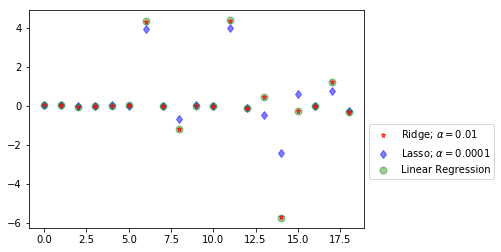

In [16]:
# Linear Regression scores plot with Ridge Regression & Lasso Coefficient

# Plot for Ridge Regression Coefficient - Low Alpha
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Plot for Lasso Regression Coefficient - Alpha 0.0001
plt.plot(lasso0001.coef_,alpha=0.5,linestyle='none',marker='d',
         markersize=6,color='blue',label=r'Lasso; $\alpha = 0.0001$')

# Plot for Linear Regression Coefficient
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,
         color='green',label='Linear Regression')

plt.legend(bbox_to_anchor=(1, 0.5))

In [17]:
# Ridge Regression with the lowest Alpha (0.01) gives us the best fit
# for this dataset
# The Random Forest Regression model was the worst of all the models tested
# Lasso Regression with the lowest Alpha (0.0001) was very close behind Ridge

In [18]:
# Predicting RBs with Linear Regression
top35_rbs = X_rb[:35]
y_top35_rbs = lr.predict(top35_rbs)
# Creating DataFrame to Visualize Prediction Results
y_top35_rbs = pd.DataFrame(y_top35_rbs)
rb_names = rb['Player'][:35]
frames = [rb_names, y_top35_rbs]
qb_names_pred = pd.concat(frames, axis=1)
qb_names_pred.columns = ['Player', 'Predicted FantPt']
qb_names_pred.sort_values(['Predicted FantPt'],ascending=False)

,Player,Predicted FantPt
0,Todd Gurley,313.677480
1,Saquon Barkley,295.189157
2,Christian McCaffrey,280.124859
3,Alvin Kamara,273.776200
4,Ezekiel Elliott,251.898313
5,Melvin Gordon,225.851521
6,James Conner,224.880487
7,Kareem Hunt,204.193180
8,Joe Mixon,200.526181
9,David Johnson,196.338219


In [19]:
# Predicting RBs with Ridge Regression
top35_rbs = X_rb[:35]
y_top35_rbs_rr = rr.predict(top35_rbs)
# Creating DataFrame to Visualize Prediction Results
y_top35_rbs_rr = pd.DataFrame(y_top35_rbs_rr)
rb_names = rb['Player'][:35]
frames = [rb_names, y_top35_rbs_rr]
rb_names_pred = pd.concat(frames, axis=1)
rb_names_pred.columns = ['Player', 'Predicted FantPt']
rb_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
0,Todd Gurley,313.677654
1,Saquon Barkley,295.191651
2,Christian McCaffrey,280.108030
3,Alvin Kamara,273.776006
4,Ezekiel Elliott,251.901658
5,Melvin Gordon,225.851338
6,James Conner,224.881330
7,Kareem Hunt,204.193607
8,Joe Mixon,200.528716
9,David Johnson,196.338616


In [20]:
# Predicting RBs with Lasso Regression
top35_qbs = X_rb[:35]
y_top35_rbs_Lasso = lasso0001.predict(top35_qbs)
# Creating DataFrame to Visualize Prediction Results
y_top35_rbs_Lasso = pd.DataFrame(y_top35_rbs_Lasso)
rb_names = rb['Player'][:35]
frames = [rb_names, y_top35_rbs_Lasso]
rb_names_pred = pd.concat(frames, axis=1)
rb_names_pred.columns = ['Player', 'Predicted FantPt']
rb_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
0,Todd Gurley,313.674358
1,Saquon Barkley,295.475230
2,Christian McCaffrey,277.870711
3,Alvin Kamara,273.830892
4,Ezekiel Elliott,252.400558
5,Melvin Gordon,225.916383
6,James Conner,224.973507
7,Kareem Hunt,204.421099
8,Joe Mixon,200.711605
9,David Johnson,196.397973
